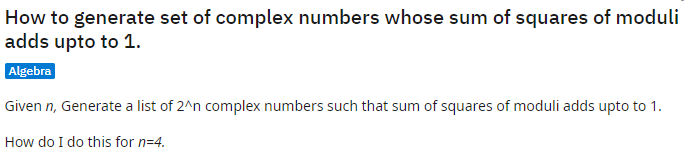

In [1]:
def generate_state_vector(num_qb=1):
    import random
    import cmath
    import math
    import numpy as np
    
    a = []
    angle_list = [-1/6,-1/4,-1/3,-1/2,-1,0,1,1/2,1/3,1/4,1/6]
    #angle_list = [-1/2,-1,0,1,1/2]
    angle_list = [x * math.pi for x in angle_list]
    
    for i in range(2**(num_qb-1)):
        plus_theta = random.choice(angle_list)
        minus_theta = -plus_theta
        a.append(cmath.exp(plus_theta*1j))
        a.append(cmath.exp(minus_theta*1j))
    
    modulo = 0
    
    for i in a:
        modulo = modulo + abs(i)
   
    modulo = math.sqrt(modulo)
    
    a = [x / modulo for x in a]
    a = np.array(a)
    
    return a

In [2]:
import numpy as np
p = generate_state_vector(3)
print(np.shape(p))
print(p)

# Verification: 

modulo = 0
    
for i in p:
    modulo = modulo + abs(i)
        
print("Verification = "+str(modulo))

(8,)
[ 0.1767767 +3.06186218e-01j  0.1767767 -3.06186218e-01j
  0.30618622+1.76776695e-01j  0.30618622-1.76776695e-01j
  0.25      -2.50000000e-01j  0.25      +2.50000000e-01j
 -0.35355339+4.32978028e-17j -0.35355339-4.32978028e-17j]
Verification = 2.8284271247461907


## Using np array into initialize QuantumCircuit:

In [3]:
from qiskit import QuantumCircuit, Aer, execute, assemble
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import array_to_latex
#from qiskit_textbook.tools import array_to_latex # Note this !!!


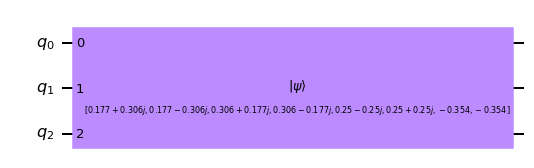

In [4]:
qc = QuantumCircuit(3)
qc.initialize(p)
qc.draw("mpl")

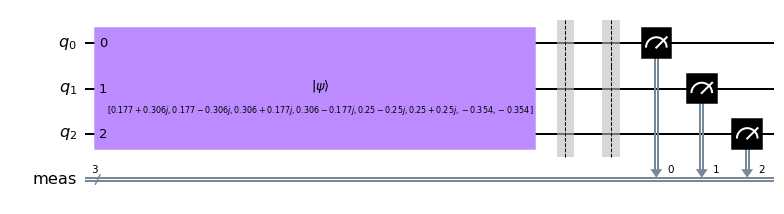

In [5]:
#backend = Aer.get_backend("statevector_simulator")
backend = Aer.get_backend('aer_simulator')

qc.save_statevector()  # QiskitError: 'You have to select a circuit or schedule when there is more than one available'
qc.measure_all()
qobj = assemble(qc)

qc.draw("mpl")

In [8]:
out  = backend.run(qobj).result().get_statevector()
 
from qiskit.visualization import array_to_latex
array_to_latex(out, prefix="\\text{Statevector = }")

 

<IPython.core.display.Latex object>